# Investigation of halo alignments in Base5000

In this notebook, we try to compare halo alignments in Base5000 compared to other reference simulations.

We already know the following things:
  - The halo shape information provided is obtained from 2 sources. The shapes of halos with masses of  >~ 10^13 are computed directly from their particle content. The shapes of halos with lower masses are modeled.  The model depends on the halo mass.
  - ultra-faint galaxies have a negative `halo id`, and they are just sprinkled to compensate for resolution effects in the simulation, they do not come from halos identified in the original simulation.

So we might want to compare the halo orientations in different mass bins above and below 10^13 to see if we find a discrepancy 

## Step I: Loading the catalog

In [7]:
%pylab inline
import GCRCatalogs
from astropy.table import Table
cat = GCRCatalogs.load_catalog('base5000_v1.1.1_small')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# The full list of native fields can be retrieved like so:
cat.list_all_native_quantities()

['restframe_extincted_sdss_abs_magg',
 'restframe_extincted_sdss_ri',
 'target_halo_redshift',
 'mvir',
 'target_halo_axis_A_y',
 'z',
 'host_centric_x',
 'x',
 'source_halo_id',
 'target_halo_axis_A_z',
 'target_halo_vx',
 'source_halo_mvir',
 'vy',
 'target_halo_z',
 'lightcone_id',
 'redshift',
 'sfr',
 'target_halo_y',
 'lightcone_replication',
 'is_on_red_sequence_ri',
 'target_halo_mass',
 'target_halo_axis_B_length',
 'target_halo_vy',
 'obs_sm',
 'host_centric_vz',
 'target_halo_axis_A_length',
 'lightcone_rotation',
 'vmax',
 'restframe_extincted_sdss_abs_magr',
 'host_centric_z',
 'target_halo_id',
 'host_halo_y',
 'is_on_red_sequence_gr',
 'host_halo_vx',
 'mpeak',
 'target_halo_axis_C_length',
 'obs_sfr',
 'restframe_extincted_sdss_gr',
 'vx',
 'sod_halo_cdelta',
 'sfr_percentile',
 'halo_id',
 'target_halo_vz',
 'vz',
 'ra',
 'target_halo_prolaticity',
 'host_halo_mvir',
 'target_halo_fof_halo_id',
 'target_halo_x',
 'host_centric_vy',
 '_obs_sm_orig_um_snap',
 'restframe_

In [8]:
# Let's retrieve the fields that are relevant
data = Table(cat.get_quantities(['target_halo_axis_A_x','target_halo_axis_A_y','target_halo_axis_A_z', # Orientation of major axis
                           'target_halo_axis_A_length', 'target_halo_axis_B_length','target_halo_axis_C_length', # Shape information
                           'halo_mass', # Mass of halos
                           'target_halo_x', 'target_halo_y', 'target_halo_z', # Halo positions
                           'x','y','z', # Galaxy positions
                           'redshift', 
                           'halo_id', 
                           'is_central']))

In [4]:
# Do we have halo shapes for everybody?
m = (data['is_central']) # Looking only at centrals
m2 = (data['is_central']) & (abs(data['target_halo_axis_A_x']) > 0) # Looking at centrals with non zero major axis
m3 = m & (data['halo_id']>0) # Centrals with positive halo_id i.e. coming from actually identified halos

Text(0, 0.5, 'log10(halo_mass)')

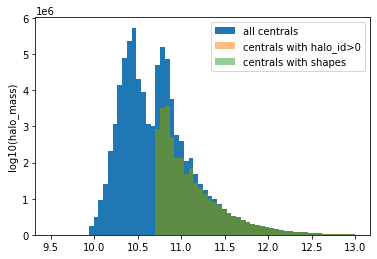

In [5]:
hist(log10(data['halo_mass'][m]),64,range=[9.5,13], label='all centrals');
hist(log10(data['halo_mass'][m3]),64,range=[9.5,13], label='centrals with halo_id>0',alpha=0.5);
hist(log10(data['halo_mass'][m2]),64,range=[9.5,13], label='centrals with shapes', alpha=0.5);
legend();
ylabel('log10(halo_mass)')

Ok, so we see that indeed only the centrals with positive halo id have actual shapes, these correspond to actual halos.

## Measuring halo alignment signal

Let's retain only actual halos, and compute their alignment signal in 3D in different mass bins.

In [164]:
# Let's select a subset of halos at redshift close to 0
mask = (data['redshift'] < 0.87) & (data['redshift'] > 0.81)
mask &= (log10(data['halo_id'])> 0)
mask &= (data['is_central'])

halo_catalog = data[mask]

In [165]:
halo_catalog

target_halo_axis_A_length,target_halo_axis_B_length,target_halo_axis_A_z,target_halo_axis_A_x,halo_id,target_halo_axis_A_y,target_halo_axis_C_length,target_halo_z,y,z,halo_mass,redshift,target_halo_y,target_halo_x,is_central,x
float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64
0.08688044548034668,0.07720333337783813,-0.010039080515158253,-0.06442041426768372,3010070259,-0.05742333057959693,0.05965922027826309,-1365.673828125,1416.9693603515625,-1365.673828125,127534625171.831,0.8647127151489258,1416.9693603515625,771.21435546875,True,771.21435546875
0.07209569960832596,0.06448052078485489,-0.03325767976351008,-0.008947526717666679,14410070259,0.0633376539224372,0.049945373088121414,-1353.18359375,1453.3543701171875,-1353.18359375,72876914659.15494,0.8699823617935181,1453.3543701171875,752.957763671875,True,752.957763671875
0.14397653937339783,0.12281820923089981,-0.11498378625434683,-0.00380136960514205,21110070259,0.08656513372992244,0.09355628490447998,-1354.47802734375,1426.4178466796875,-1354.47802734375,580412845791.5493,0.866919755935669,1426.4178466796875,784.9921264648438,True,784.9921264648438
0.11807513236999512,0.1029086783528328,-0.1038888393771687,0.00871341774628643,21910070259,0.05543394527034329,0.07897590845823288,-1399.018798828125,1398.423583984375,-1399.018798828125,320138006354.92957,0.8657543659210205,1398.423583984375,750.4796142578125,True,750.4796142578125
0.12328192591667175,0.10702185332775116,0.01726498551400753,-0.07786978466150032,27510070259,0.09400345828583341,0.08201878517866135,-1369.0025634765625,1416.533203125,-1369.0025634765625,364384729059.15497,0.8676682710647583,1416.533203125,781.5480346679688,True,781.5480346679688
0.08317884057760239,0.07404589653015137,-0.028682141634566987,-0.029972316457989527,27610070259,-0.07209517679589227,0.05725637078285217,-1361.1962890625,1426.654052734375,-1361.1962890625,111918134805.6338,0.8658852577209473,1426.654052734375,767.4140625,True,767.4140625
0.06942299753427505,0.06215113028883934,-0.002231211402628516,-0.06570996380466347,27710070259,0.022288448557729566,0.04815851151943207,-1379.7781982421875,1412.1368408203125,-1379.7781982421875,65068669476.05634,0.8665608167648315,1412.1368408203125,764.6369018554688,True,764.6369018554688
0.0644465982913971,0.05779308080673218,0.027506091565573598,-0.046939153681696946,27810070259,-0.03454699422185705,0.044809505343437195,-1365.9202880859375,1431.63818359375,-1365.9202880859375,52054927504.22536,0.8666746616363525,1431.63818359375,753.7781372070312,True,753.7781372070312
0.10639900714159012,0.09349162876605988,0.018697620476520422,0.07179077372200883,27910070259,-0.07627078416816938,0.07195557653903961,-1382.690673828125,1407.953125,-1382.690673828125,234247309340.8451,0.864875078201294,1407.953125,758.145751953125,True,758.145751953125


In [166]:
import sys
sys.path.insert(0, '/global/u2/f/flanusse/.local/lib/python3.7/site-packages/')

import halotools
import halotools_ia
from halotools_ia.correlation_functions import ed_3d,ee_3d, ed_3d_one_two_halo_decomp

In [167]:
halo_coords = np.vstack((halo_catalog['x'],
                         halo_catalog['y'],
                         halo_catalog['z'])).T

halo_orientations = np.vstack((halo_catalog['target_halo_axis_A_x'],
                               halo_catalog['target_halo_axis_A_y'],
                               halo_catalog['target_halo_axis_A_z'])).T

mask = (np.log10(halo_catalog['halo_mass'])>13)

In [168]:
print("number of halos", len(halo_coords[mask]))

number of halos 2481


In [169]:
from halotools_ia.correlation_functions import ed_3d, ee_3d
rbins = np.logspace(-1,1.4,12)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

In [170]:
# calculate alignment correlation functions for the haloes
halo_eta1 = ed_3d(halo_coords[mask], halo_orientations[mask], halo_coords[mask],
                 rbins)
halo_omega1 = ee_3d(halo_coords[mask], halo_orientations[mask], halo_coords[mask], halo_orientations[mask],
                   rbins)

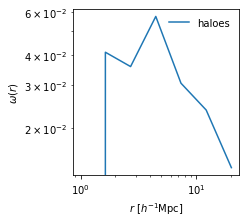

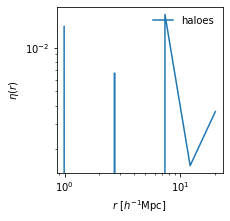

In [171]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p2, = plt.plot(rbin_centers, halo_eta1, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.legend([p2],['haloes'], frameon=False, loc='upper right', fontsize=10)
plt.show()


fig, ax  = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p2, = plt.plot(rbin_centers, halo_omega1, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.legend([p2],['haloes'], frameon=False, loc='upper right', fontsize=10)
plt.show()

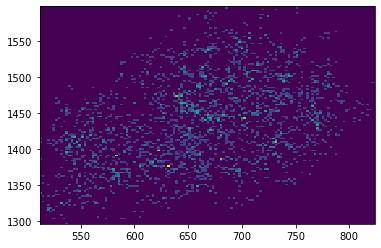

In [172]:
hist2d(halo_catalog['x'][mask], halo_catalog['y'][mask],128);

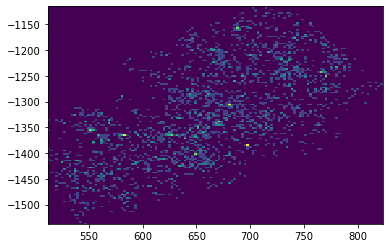

In [173]:
hist2d(halo_catalog['x'][mask], halo_catalog['z'][mask],128);

In [174]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0.84, version_name='halotools_v0p4')

In [175]:
# Halo coordinates and orientations
mask = (halocat.halo_table['halo_mpeak']>10**13) & (halocat.halo_table['halo_upid'] <0)
halo_coords = np.vstack((halocat.halo_table['halo_x'],
                           halocat.halo_table['halo_y'],
                           halocat.halo_table['halo_z'])).T

halo_orientations = np.vstack((halocat.halo_table['halo_axisA_x'],
                                 halocat.halo_table['halo_axisA_y'],
                                 halocat.halo_table['halo_axisA_z'])).T

In [176]:
print("Number of halos remaining:", len(halo_coords[mask]))

Number of halos remaining: 3293


In [177]:
# calculate alignment correlation functions for the haloes
halo_eta2 = ed_3d(halo_coords[mask], halo_orientations[mask], halo_coords[mask],
                 rbins, period=halocat.Lbox)
halo_omega2 = ee_3d(halo_coords[mask], halo_orientations[mask], halo_coords[mask], halo_orientations[mask],
                   rbins, period=halocat.Lbox)

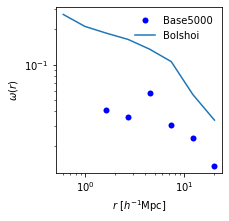

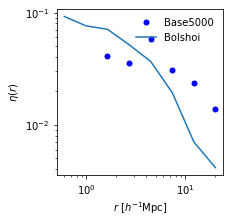

In [178]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, halo_eta1, 'o', color='blue', mec='none')
p2, = plt.plot(rbin_centers, halo_eta2, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.legend([p1,p2],['Base5000','Bolshoi'], frameon=False, loc='upper right', fontsize=10)
plt.show()

fig, ax  = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, halo_eta1, 'o', color='blue', mec='none')
p2, = plt.plot(rbin_centers, halo_omega2, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.legend([p1,p2],['Base5000','Bolshoi'], frameon=False, loc='upper right', fontsize=10)
plt.show()
